# Scrum guide 2020 text frequency analysis

In [1]:
# install required modules
#!pip install 

In [77]:
# importing required modules
import PyPDF2
#for text analysis
import requests
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

### Read PDF

In [78]:
# creating a pdf file object
pdfFileObj = open('2020-Scrum-Guide-US-3.pdf', 'rb')
  
# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
  
# printing number of pages in pdf file
numPages = pdfReader.numPages

print(f"Number of pages in the pdf file: ", numPages)

Number of pages in the pdf file:  14


### Process PDF page by page, retrieve tokens

In [79]:
# Read pdf page by page, extract text, tokenize text, create a list of words:
allWords2 = []

for i in range(numPages):
    
    #skip List of contents page
    if i == 2 : continue
        
    pageObj = pdfReader.getPage(i)

    text = pageObj.extractText()
    token = re.findall('\w+', text)

    words2 = []
     
    for word in token:
        words2.append(word.lower())
    allWords2.extend(words2)     

print(allWords2[100:115])

['ideas', 'of', 'scrum', 'leaving', 'out', 'elements', 'or', 'not', 'following', 'the', 'rules', 'of', 'scrum', 'covers', 'up']


In [80]:
# closing the pdf file object
pdfFileObj.close()

In [81]:
# retrieve stop words - nltk package
nltk.download("stopwords")
sw = nltk.corpus.stopwords.words('english')
type(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katarzynascibisz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


list

### Get the list of words without stopwords

In [82]:
# get the list without stop words

words_ne = []
for word in allWords2:
    if word not in sw:
        words_ne.append(word)

words_ne[100:105]

['scrum', 'roots', 'scrum', 'use', 'spreads']

### Prepare frequency plot

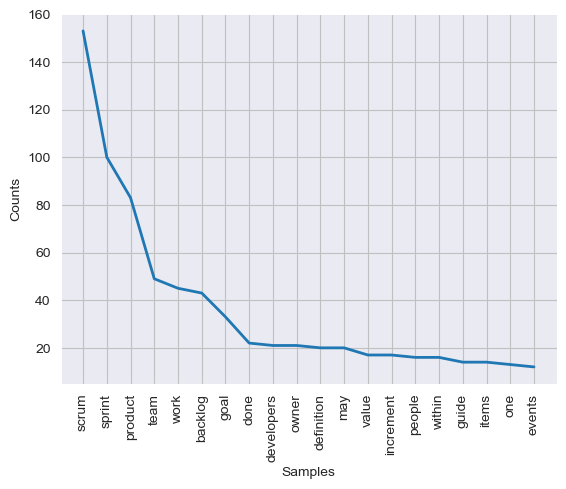

In [89]:
sns.set_style('darkgrid')
nlp_words = nltk.FreqDist(words_ne)
nlp_words.plot(20);

In [42]:
#sw.extend('●')

In [90]:
# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [92]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.8 MB/s eta 0:00:00a 0:00:01


### Create a word cloud basing on wordcloud package

In [119]:
# Import package
from wordcloud import WordCloud, STOPWORDS

# wordcloud accepts strings, not lists, transform
listToStr = ' '.join([str(elem) for elem in allWords2])
#listToStr

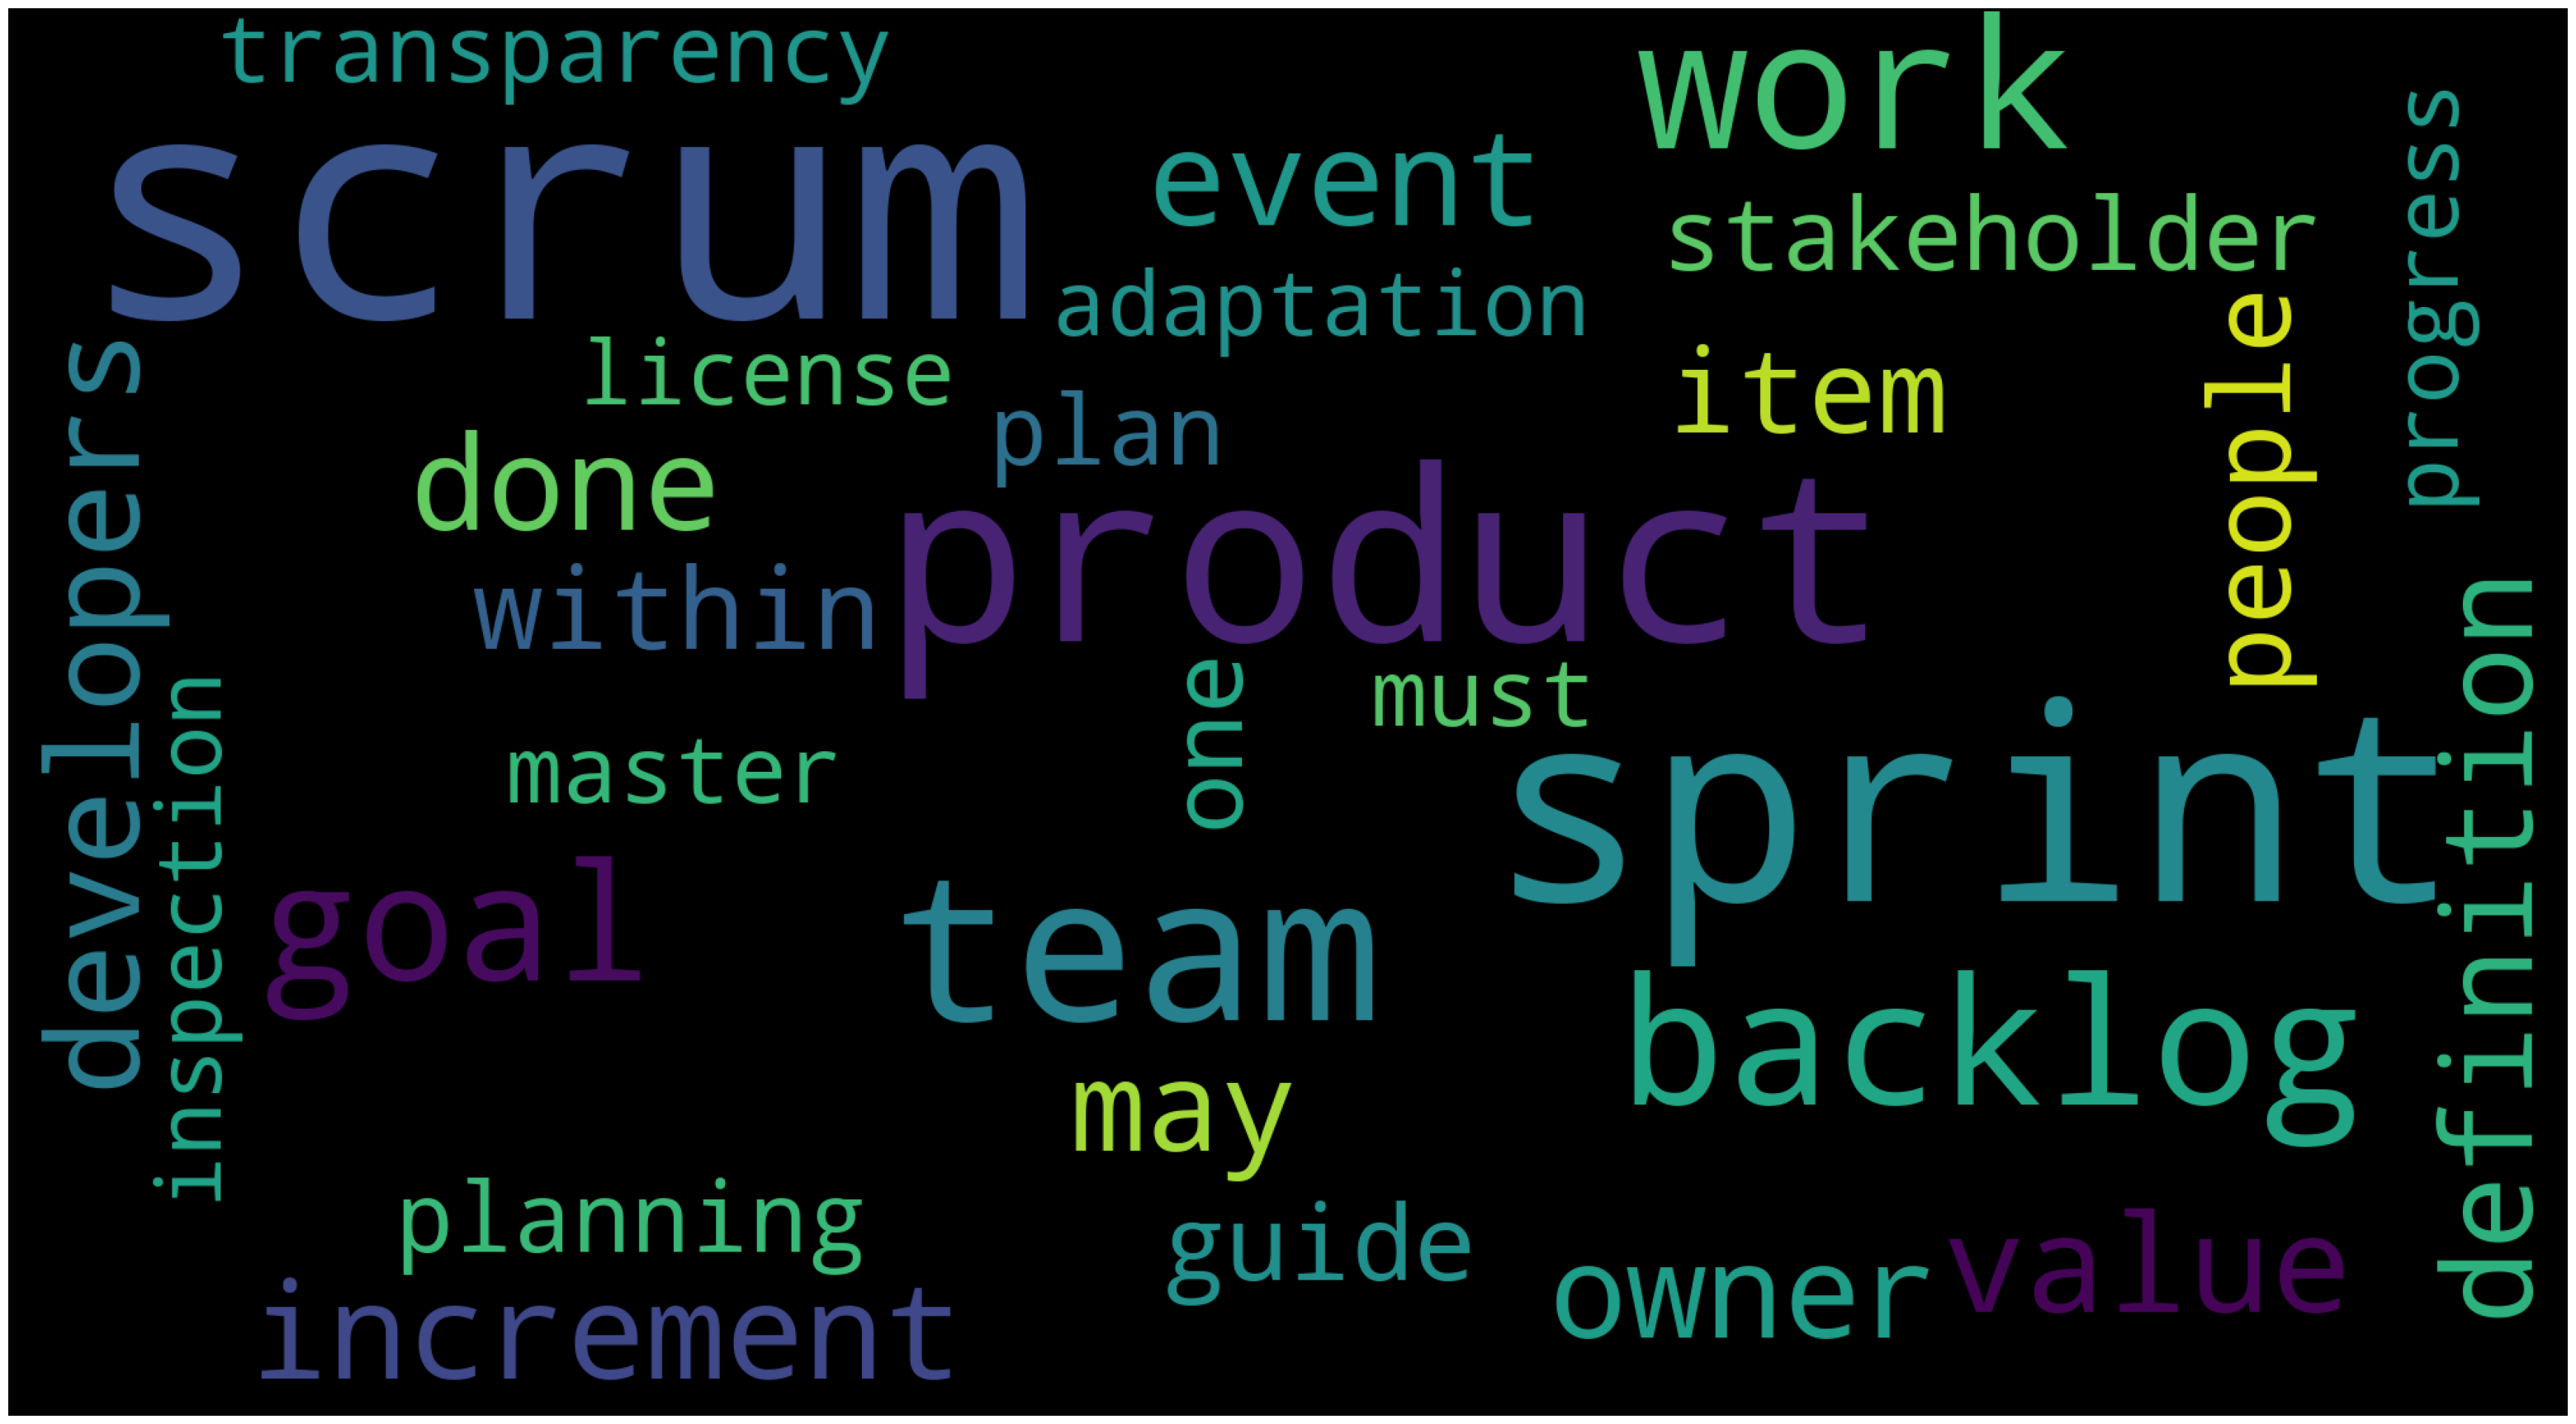

In [115]:
# Generate word cloud
wordcloud = WordCloud(width= 2000, height = 1100, max_words=30
                      
                      , random_state=1, max_font_size=250
                      , background_color='black' #, colormap='Pastel1'
                      , collocations=False, stopwords = sw).generate(listToStr)
# Plot
plot_cloud(wordcloud)

In [ ]:
"""
from itertools import groupby

words = "apple banana apple strawberry banana lemon"
words = words.split()

result = dict((key, len(list(group))) for key, group in groupby(sorted(words)))
print result

"""

In [ ]:
### TODO - adjust word cloud to make it more readible